# Exercicios de Zeros de Funcoes e Interpolacao Polinomial

In [ ]:
import math
from typing import Callable,Tuple
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Zeros de funcao
class Bissecao():
    def __init__(self,function:Callable[[float], float],intervalo: Tuple[int, int],number_iterations:int) -> None:
        self.function = function
        self.iterations = [intervalo]
        self.number_iterations = number_iterations
        self.iterate()
        self.table()
    def table(self):
        table = {
            'X':self.iterations,
            'Y0':[self.function(x[0]) for x in self.iterations],
            'Y1':[self.function(x[1]) for x in self.iterations]
        }
        df = pd.DataFrame(table)
        print(df)

    def iterate(self):
        if len(self.iterations)<=self.number_iterations:
            last_iteration = self.iterations[-1]
            n_point = sum(last_iteration)/2
            positive = last_iteration[0] if self.function(last_iteration[0])>0 else last_iteration[1]
            negative = last_iteration[0] if self.function(last_iteration[0])<0 else last_iteration[1]
            if self.function(n_point) < 0:
                new_iteration = (n_point,positive)
            else:
                new_iteration = (negative,n_point)
            self.iterations.append(
                new_iteration
            )
            self.iterate()
    def plot(self):
        last_interval = self.iterations[-1]
        last_x = sum(last_interval)/2   # ponto médio
        last_y = self.function(last_x)
        plt.scatter(last_x, last_y, color='red', s=100, zorder=5, label=f'Última iteração: {last_x:.4f}')
        x_vals = np.linspace(self.iterations[0][0]-0.1, self.iterations[0][1]+0.1, 200)
        y_vals = [self.function(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')
        plt.axhline(0, color='black', linewidth=0.8)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Bisseção")
        plt.grid(True)
        plt.legend()
        plt.show()


class NewtonRaphson():
    def __init__(self,function:Callable[[float], float],derivative:Callable[[float], float],initialSock:int,number_iterations:int) -> None:
        self.function = function
        self.derivative = derivative
        self.iterations = [initialSock]
        self.number_iterations = number_iterations
        self.iterate()
        self.table()
    
    def iterate(self):
        if len(self.iterations)<=self.number_iterations:
            last_x = self.iterations[-1]
            self.iterations.append(last_x-(self.function(last_x)/self.derivative(last_x)))
            self.iterate()

    def table(self):
        table = {
            'X':self.iterations,
            'Y':[self.function(x) for x in self.iterations]
        }
        df = pd.DataFrame(table)
        print(df)

    def plot(self):
        x_vals = np.linspace(min(self.iterations)-1, max(self.iterations)+1, 200)
        y_vals = [self.function(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')
        last_x = self.iterations[-1]
        last_y = self.function(last_x)
        plt.scatter(last_x, last_y, color='red', s=100, zorder=5, label=self.iterations[-1])
        plt.axhline(0, color='black', linewidth=0.8)  # eixo x
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Newton-Raphson")
        plt.grid(True)
        plt.legend()
        plt.show()

### Exercício 1: Altura de um Projétil (Método de Newton-Raphson)
* Contexto: Um projétil é lançado verticalmente e sua altura h(t) em metros, em função do tempo t em segundos, é dada por h(t) = −4.9t2 + 20t + 10. Um cientista quer saber o tempo exato em que o projétil atinge uma altura de 15 metros.
* Problema: Encontre o tempo t para o qual h(t) = 15, ou seja, a raiz de f (t) = −4.9t2 +20t−5 = 0.Aplique o Método de Newton-Raphson com um chute inicial t0 = 3 segundos. Realize 3 iterações.
* Representação Gráfica: Represente graficamente a função f (t) e as tangentes geradas em cada iteração, ilustrando a convergência do método.
* Dica Python: Implemente a função f (t) e sua derivada f ′(t) para as iterações.

          X          Y
0  3.000000  10.900000
1  4.159574  -6.588603
2  3.842263  -0.493365
3  3.814317  -0.003827


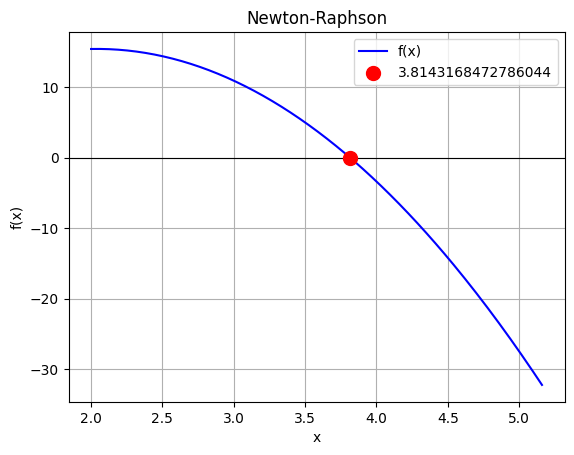

In [38]:
nr = NewtonRaphson(
    function = lambda x:-4.9*x**2+20*x-5,
    derivative = lambda x:-9.8*x+20,
    initialSock = 3,
    number_iterations = 3
)
nr.plot()

### Exercício 2: Corrente em Circuito Elétrico Não Linear (Método de Newton-Raphson)
* Contexto: Em um circuito elétrico com um componente não linear, a relação entre a corrente
I e a tensão V pode ser complexa. Suponha que a tensão V em um ponto do circuito seja dada
pela equação V (I) = I3 + 2I − 5. Queremos encontrar a corrente I para uma tensão específica de
V = 10 Volts.
* Problema: Encontre a corrente I para a qual V (I) = 10, ou seja, a raiz de f (I) = I3 +2I −15 = 0.
Use o Método de Newton-Raphson com um chute inicial I0 = 2 Amperes. Aplique o critério de
parada com um erro aproximado Ea < 0.001.
* Dica Python: Implemente o método em Python, exibindo as iterações e o valor final de I que
satisfaz o critério de parada

          X             Y
0  2.000000 -3.000000e+00
1  2.214286  2.853499e-01
2  2.197208  1.932332e-03
3  2.197091  9.058719e-08


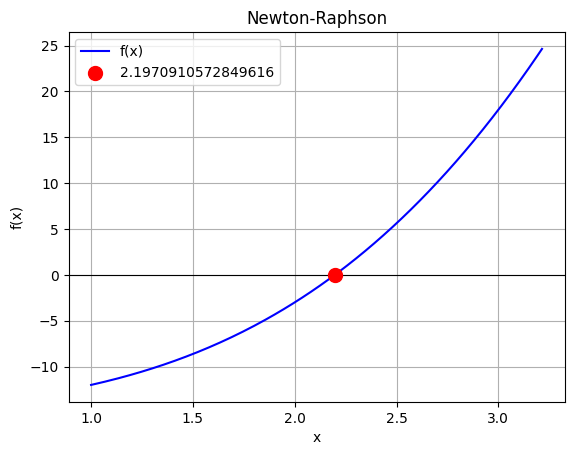

In [43]:
nr = NewtonRaphson(
    function = lambda i:i**3+2*i-15,
    derivative = lambda i:3*i**2+2,
    initialSock = 2,
    number_iterations = 3
)
nr.plot()

### Exercício 3: Taxa de Juros para Valor Futuro de Investimento (Comparação de Métodos
para Raízes)
* Contexto: Uma pessoa está planejando um investimento e quer saber a taxa de juros necessária
para atingir um valor futuro específico em um determinado período. A equação do valor futuro
com juros compostos contínuos é F V = P V · ert.
* Problema: Se o Valor Presente (P V ) é R$ 1000, o Valor Futuro (F V ) desejado é R$ 1500,
e o tempo (t) é de 5 anos, queremos encontrar a taxa de juros r. Ou seja, a raiz de f (r) =
1000e5r − 1500 = 0.
* Representação Gráfica: Represente graficamente a função f (r) e compare visualmente a con-
vergência de ambos os métodos, destacando a velocidade de cada um.
* Discussão: Qual método parece convergir mais rapidamente para este problema? Qual seria mais
adequado para um cenário onde a derivada da função é fácil de calcula
#### a) Use o Método da Bisseção no intervalo [0.05, 0.1] para encontrar a raiz. Realize 4 iterações.


                                             X          Y0          Y1
0                                  (0.05, 0.1) -215.974583  148.721271
1                   (0.07500000000000001, 0.1)  -45.008585  148.721271
2   (0.07500000000000001, 0.08750000000000001)  -45.008585   48.830299
3   (0.07500000000000001, 0.08125000000000002)  -45.008585    1.177800
4   (0.07812500000000001, 0.08125000000000002)  -22.095805    1.177800
5   (0.07968750000000002, 0.08125000000000002)  -10.504458    1.177800
6   (0.08046875000000002, 0.08125000000000002)   -4.674738    1.177800
7   (0.08085937500000001, 0.08125000000000002)   -1.751326    1.177800
8   (0.08105468750000001, 0.08125000000000002)   -0.287478    1.177800
9   (0.08105468750000001, 0.08115234375000002)   -0.287478    0.444982
10  (0.08105468750000001, 0.08110351562500001)   -0.287478    0.078707


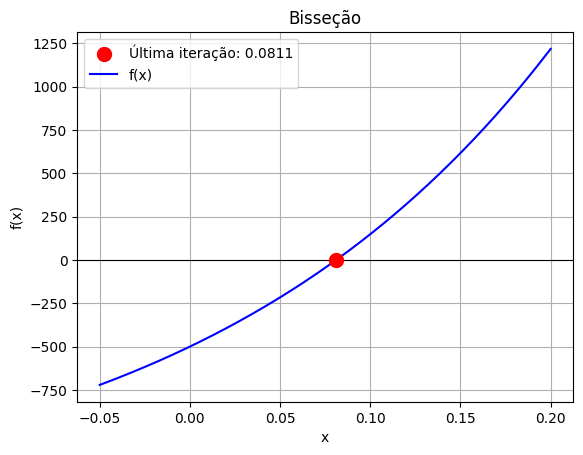

In [44]:
function_ex3 = lambda r:1000*math.e**(5*r)-1500
b = Bissecao(
    function = function_ex3,
    intervalo = (0.05,0.1),
    number_iterations = 10
)
b.plot()

#### b) Use o Método de Newton-Raphson com chute inicial r0 = 0.08 para encontrar a raiz. Realize 3 iterações.

          X             Y
0  0.080000 -8.175302e+00
1  0.081096  2.244159e-02
2  0.081093  1.678718e-07
3  0.081093  0.000000e+00


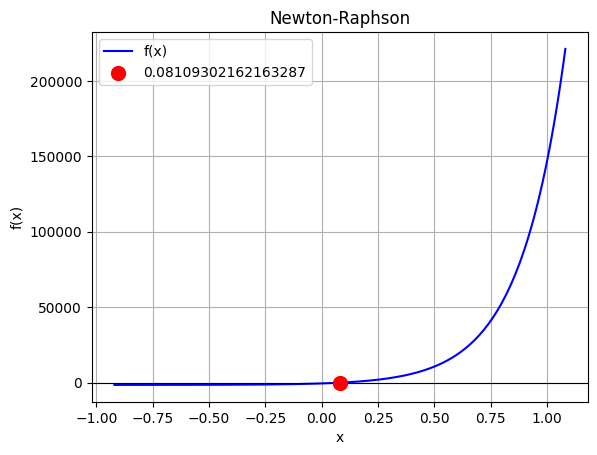

In [41]:
nr = NewtonRaphson(
    function = function_ex3,
    derivative = lambda r:5000*math.e**(5*r),
    initialSock = 0.08,
    number_iterations = 3
)
nr.plot()

### Exercício 4: Otimização de Hiperparâmetros em Modelos de Machine Learning (Método
de Newton-Raphson)
* Contexto: Em Machine Learning, a escolha de hiperparâmetros (como a taxa de aprendizado) é
crucial para o desempenho do modelo. Frequentemente, buscamos o valor de um hiperparâmetro
que minimize uma função de custo ou erro. Suponha que a função de custo J(α) em relação à taxa
de aprendizado α seja modelada por J(α) = α3 − 2.5α2 + 0.5α + 0.1. Para encontrar o valor ótimo
de α, precisamos encontrar onde a derivada de J(α) é zero.
* Problema: Encontre a raiz da função J′(α) = 3α2 − 5α + 0.5 = 0 usando o Método de Newton-
Raphson. Utilize um chute inicial α0 = 1.5. Realize 3 iterações e apresente o valor final de α.
* Representação Gráfica: Represente graficamente a função J′(α) e as iterações do método de
Newton-Raphson, mostrando como ele se aproxima da raiz

          X             Y
0  0.080000  1.192000e-01
1  0.106372  2.086397e-03
2  0.106850  6.864194e-07
3  0.106850  7.444045e-14


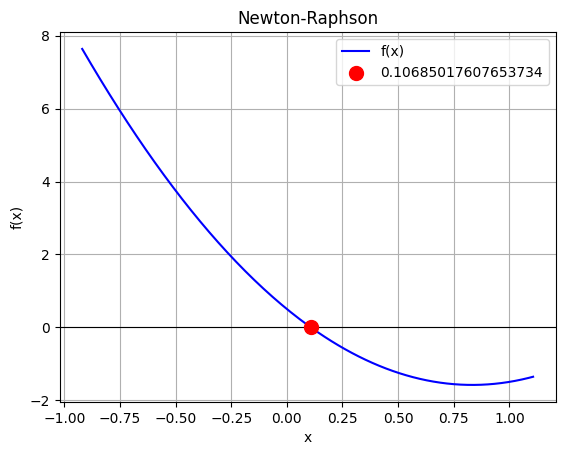

In [45]:
nr = NewtonRaphson(
    function = lambda lamb:3*lamb**2-5*lamb+0.5,
    derivative = lambda lamb:6*lamb-5,
    initialSock = 0.08,
    number_iterations = 3
)
nr.plot()

### Exercício 5: Determinação de Limiar para Classificador Binário (Método da Bisseção)
* Contexto: Em problemas de classificação binária (e.g., detecção de spam, diagnóstico médico),
um modelo de IA geralmente produz uma probabilidade. Para tomar uma decisão (spam/não
spam), um limiar é aplicado a essa probabilidade. A função de custo associada a esse limiar pode
ser complexa, e encontrar o limiar ideal pode envolver encontrar um zero de uma função.
* Problema: Suponha que a função de custo C(T ) para um limiar T seja dada por C(T ) = sin(T ) −
T /2 + 0.1, onde T está no intervalo [0, π/2]. Encontre um limiar T onde o custo é zero, ou seja,
a raiz de C(T ) = 0, usando o Método da Bisseção no intervalo [0.5, 1.5]. Realize 4 iterações e
apresente o intervalo final.
* Representação Gráfica: Represente graficamente a função C(T ) e os intervalos de busca a cada
iteração, destacando a convergência para a raiz.

                              X        Y0        Y1
0                    (0.5, 1.5)  0.329426  0.347495
1                    (1.5, 1.0)  0.347495  0.441471
2                   (1.0, 1.25)  0.441471  0.423985
3                 (1.25, 1.125)  0.423985  0.439768
4               (1.125, 1.1875)  0.439768  0.433687
5             (1.1875, 1.15625)  0.433687  0.437174
6           (1.15625, 1.171875)  0.437174  0.435543
7         (1.171875, 1.1640625)  0.435543  0.436387
8       (1.1640625, 1.16796875)  0.436387  0.435972
9     (1.16796875, 1.166015625)  0.435972  0.436181
10  (1.166015625, 1.1669921875)  0.436181  0.436077


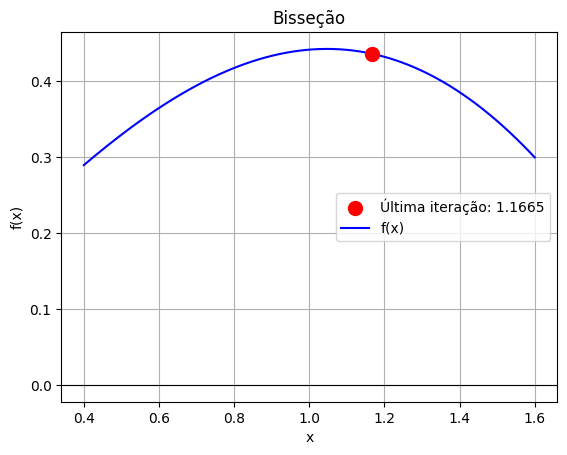

In [ ]:
# intervalo incoerente abaixo coloco em (-0.5,0.5)
b = Bissecao(
    function = lambda t:math.sin(t)-t/2+0.1,
    intervalo = (0.5,1.5),
    number_iterations = 10
)
b.plot()

                             X        Y0        Y1
0                  (-0.5, 0.5) -0.129426  0.329426
1                  (-0.5, 0.0) -0.129426  0.100000
2                 (-0.25, 0.0) -0.022404  0.100000
3              (-0.25, -0.125) -0.022404  0.037825
4             (-0.25, -0.1875) -0.022404  0.007347
5          (-0.21875, -0.1875) -0.007635  0.007347
6         (-0.203125, -0.1875) -0.000169  0.007347
7      (-0.203125, -0.1953125) -0.000169  0.003583
8     (-0.203125, -0.19921875) -0.000169  0.001706
9    (-0.203125, -0.201171875) -0.000169  0.000768
10  (-0.203125, -0.2021484375) -0.000169  0.000300


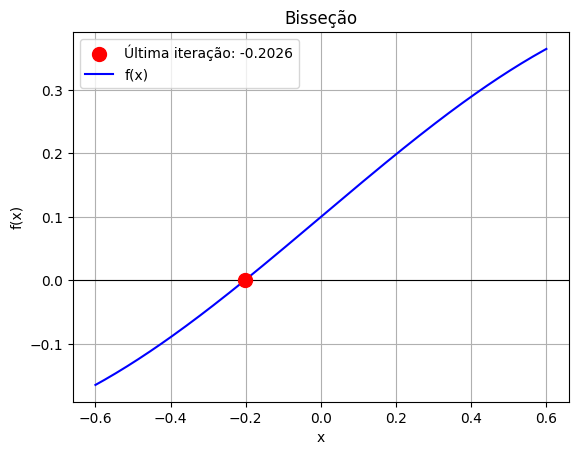

In [47]:
intervalo_coerente = Bissecao(
    function = lambda t:math.sin(t)-t/2+0.1,
    intervalo = (-0.5,0.5),
    number_iterations = 10
)
intervalo_coerente.plot()

## Seção 2: Interpolação Polinomial (Lagrange e Newton)


In [ ]:
# Interpolacao polinomial
class Lagrange():
    def __init__(self,x,points):
        

class Newton():
    pass

### Exercício 6: Concentração de Reagente Químico (Interpolação de Lagrange)
* Contexto: Em um experimento de química, a concentração de um reagente foi medida em dife-
rentes tempos. Queremos estimar a concentração em um tempo intermediário sem realizar uma
nova medição, para otimizar o processo.
* Problema: Dados os pontos (Tempo em minutos, Concentração em mol/L): (0, 1.0), (2, 0.8),
(5, 0.4). Use a Interpolação de Lagrange para estimar a concentração no Tempo t = 3 minutos.
* Representação Gráfica: Plote os pontos dados e o polinômio interpolador de Lagrange resul-
tante. Destaque o ponto estimado no gráfico. Dica Python: Crie uma função em Python para
calcular os polinômios de base Lj (x) e o polinômio interpolador P (x).

In [ ]:
points = [
    (0, 1.0), 
    (2, 0.8),
    (5, 0.4)
]
x = [3]
l = Lagrange(x,points)